In [4]:
import astropy.units as u
from astroquery.xmatch import XMatch
from astropy.table import Table
from astropy.table import Column
from astroquery.vizier import Vizier
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
from astroquery.xmatch import XMatch
import numpy as np
import pandas as pd
from astropy.io import ascii

coord = SkyCoord("04:30:47.99", "+64:50:56.5", unit=(u.hourangle, u.deg), frame='icrs')
rad = 6 * u.arcminute

catalogs = ['vizier:I/350/gaiaedr3', 'vizier:II/246/out', 'vizier:II/328/allwise', 'vizier:II/349/ps1']
catalog = ['I/350/gaiaedr3', 'II/246/out', 'II/328/allwise', 'II/349/ps1']

data = Table()
df_gaia = Table(names=('RA_ICRS','DE_ICRS'))
data_2mass = Table()
data_wise = Table()
data_panstarrs = Table()
#names=('RA_ICRS', 'DE_ICRS', 'Gmag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag', 'W4mag', 'gmag', 'rmag'))

df_gaia = Table(names=('RA_ICRS', 'DE_ICRS', 'Gmag'))
df_2mass = Table(names=('RAJ2000', 'DEJ2000', 'Jmag', 'Hmag', 'Kmag'))
df_wise = Table(names=('RAJ2000', 'DEJ2000', 'W1mag', 'W2mag', 'W3mag', 'W4mag'))
df_panstarrs = Table(names=('RAJ2000', 'DEJ2000', 'gmag', 'rmag'))

for i in range(len(catalogs)):
    result_table = Vizier.query_region(coord, radius=rad, catalog=catalog[i])
    #result_table.pprint(show_unit=True, max_lines=100, max_width=1000)
    if i==0:
        df_gaia = result_table[0]['RA_ICRS','DE_ICRS', 'Gmag']
    if i==1:
        df_2mass = result_table[0]['RAJ2000', 'DEJ2000', 'Jmag', 'Hmag', 'Kmag']
    if i==2:
        df_wise = result_table[0]['RAJ2000', 'DEJ2000', 'W1mag', 'W2mag', 'W3mag', 'W4mag']
    if i==3:
        df_panstarrs = result_table[0]['RAJ2000', 'DEJ2000', 'gmag', 'rmag', 'imag', 'zmag']
       
data_2mass = XMatch.query(cat1=df_gaia,
                     cat2=catalogs[1],
                     max_distance=3*u.arcsec,
                     colRA1='RA_ICRS', colDec1='DE_ICRS')

data_wise = XMatch.query(cat1=data_2mass,
                     cat2=catalogs[2],
                     max_distance=3*u.arcsec,
                     colRA1='RA_ICRS', colDec1='DE_ICRS')

data_panstarrs = XMatch.query(cat1=data_wise,
                     cat2=catalogs[3],
                     max_distance=3*u.arcsec,
                     colRA1='RA_ICRS', colDec1='DE_ICRS')

data.add_columns([data_panstarrs['RA_ICRS'], data_panstarrs['DE_ICRS'], data_panstarrs['Gmag'],
                  data_panstarrs['Jmag_2'], data_panstarrs['Hmag_2'], data_panstarrs['Kmag_2'],
                  data_panstarrs['W1mag'], data_panstarrs['W2mag'], data_panstarrs['W3mag'], data_panstarrs['W4mag'],
                  data_panstarrs['gmag'], data_panstarrs['rmag'], data_panstarrs['imag'], data_panstarrs['zmag']])

gaia_flux = Column(data=10**((data['Gmag']-25.6884)/-2.5), name='G_flux')
gaia_wl = Column(data=[690]*len(data), name='G_wave_length')

J2mass_flux = Column(data=1594*10**(-0.4*data['Jmag_2']), name='J_flux')
J2mass_wl = Column(data=[1235]*len(data), name='J_wave_length')
H2mass_flux = Column(data=1024*10**(-0.4*data['Hmag_2']), name='H_flux')
H2mass_wl = Column(data=[1662]*len(data), name='H_wave_length')
K2mass_flux = Column(data=666.7*10**(-0.4*data['Kmag_2']), name='K_flux')
K2mass_wl = Column(data=[2159]*len(data), name='K_wave_length')

W1_flux = Column(data=309.54*10**(-0.4*data['W1mag']), name='W1_flux')
W1_wl = Column(data=[3368]*len(data), name='W1_wave_length')
W2_flux = Column(data=171.79*10**(-0.4*data['W1mag']), name='W2_flux')
W2_wl = Column(data=[4618]*len(data), name='W2_wave_length')
W3_flux = Column(data=31.676*10**(-0.4*data['W1mag']), name='W3_flux')
W3_wl = Column(data=[12082]*len(data), name='W3_wave_length')
W4_flux = Column(data=8.3635*10**(-0.4*data['W1mag']), name='W4_flux')
W4_wl = Column(data=[22194]*len(data), name='W4_wave_length')

gps_flux = Column(data=0.4810*10**(-0.4*data['gmag']), name = 'g_flux')
gps_wl = Column(data=[481]*len(data), name='g_wave_length')
rps_flux = Column(data=0.6170*10**(-0.4*data['rmag']), name = 'r_flux')
rps_wl = Column(data=[617]*len(data), name='r_wave_length')
ips_flux = Column(data=0.7520*10**(-0.4*data['imag']), name = 'i_flux')
ips_wl = Column(data=[752]*len(data), name='i_wave_length')
zps_flux = Column(data=0.8660*10**(-0.4*data['zmag']), name = 'z_flux')
zps_wl = Column(data=[866]*len(data), name='z_wave_length')

data.add_columns([gaia_flux, gaia_wl,
                  J2mass_flux, J2mass_wl, H2mass_flux, H2mass_wl, K2mass_flux, K2mass_wl,
                  W1_flux, W1_wl, W2_flux, W2_wl, W3_flux, W3_wl, W4_flux, W4_wl,
                  gps_flux, gps_wl, rps_flux, rps_wl, ips_flux, ips_wl, zps_flux, zps_wl])
data.remove_columns(['Gmag', 'Jmag_2', 'Hmag_2', 'Kmag_2', 'W1mag', 'W2mag', 'W3mag', 'W4mag', 'gmag', 'rmag', 'imag', 'zmag'])
#r['pmdec'] = r['pmdec'].apply(correct_pm)
#plt.quiver(r["ra"].filled(0), r["dec"].filled(0), r["pmra"].filled(0), r["pmdec"].filled(0), color='0.4')
#plt.show()

In [6]:
data

RA_ICRS,DE_ICRS,G_flux,G_wave_length,J_flux,J_wave_length,H_flux,H_wave_length,K_flux,K_wave_length,W1_flux,W1_wave_length,W2_flux,W2_wave_length,W3_flux,W3_wave_length,W4_flux,W4_wave_length,g_flux,g_wave_length,r_flux,r_wave_length,i_flux,i_wave_length,z_flux,z_wave_length
float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64
67.65393185732,64.76572693604,669.3708567463565,690,0.000779270645567266,1235,0.0008651670215521495,1662,0.0006981206029855341,2159,0.00038398722706726996,3368,0.0002131070806289536,4618,3.929437037081748e-05,12082,1.037499894545814e-05,22194,3.599026764808891e-09,481,1.8051993315527703e-08,617,4.849509792086649e-08,752,8.47301337613596e-08,866
67.63863570041,64.76042696261,4295.016138208234,690,0.0020515793405478096,1235,0.0020773035181734837,1662,0.001542873980849552,2159,0.0007912555664084165,3368,0.00043913482507366373,4618,8.097115500921691e-05,12082,2.1379033177155752e-05,22194,4.3281776330344336e-08,481,1.3405566273589294e-07,617,2.5878424976657064e-07,752,3.769449175840737e-07,866
67.5994214376,64.76052089568,290.22391749684897,690,0.00038948283009941826,1235,0.0005499205594831382,1662,0.0004457901365241658,2159,0.0002591294529846578,3368,0.0001438129118312152,4618,2.6517363031407958e-05,12082,7.001451121138416e-06,22194,9.05451257820988e-10,481,6.13882374120362e-09,617,2.312372738138783e-08,752,4.754204863862653e-08,866
67.62341151427,64.76220729184,423.8064870387468,690,0.001203617010898702,1235,0.0013474105908182184,1662,0.001055675530413848,2159,0.0005690059113409272,3368,0.00031578964111022125,4618,5.822779365392262e-05,12082,1.5374041931575385e-05,22194,1.669494821853027e-08,481,5.792221535969875e-08,617,1.1928280427374871e-07,752,1.904398768745528e-07,866
67.63421636755,64.77217830975,886.3825548625372,690,0.0019076044069037434,1235,0.002155261428383719,1662,0.0015528533922636496,2159,0.0010536995104004783,3368,0.0005847872290873494,4618,0.00010782769816968904,12082,2.847003894564321e-05,22194,0.481,481,2.638549001480053e-08,617,5.91803924184736e-08,752,9.656903509573286e-08,866
67.63421636755,64.77217830975,886.3825548625372,690,0.0019076044069037434,1235,0.002155261428383719,1662,0.0015528533922636496,2159,0.0010536995104004783,3368,0.0005847872290873494,4618,0.00010782769816968904,12082,2.847003894564321e-05,22194,2.9170580810637575e-08,481,9.665963793402053e-08,617,1.983434397148786e-07,752,2.897329524581811e-07,866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67.60992404072,64.7969389951,2900.9109676388134,690,0.0012430491961740726,1235,0.001155313788568567,1662,0.0009979998020019172,2159,0.00042336678067493843,3368,0.0002349621349491105,4618,4.332417827957404e-05,12082,1.1439000032870864e-05,22194,3.335378126939692e-08,481,9.214784095033928e-08,617,1.676400727349432e-07,752,2.3724544996348324e-07,866
67.59771206665,64.79745183534,2444.515526171413,690,0.0009649133543577383,1235,0.0008845043164458825,1662,0.00062162783819834,2159,0.00043562899503506137,3368,0.00024176747773170892,4618,4.457900124937198e-05,12082,1.17703143373255e-05,22194,2.9443204566145943e-08,481,7.812772243716201e-08,617,1.3956542441348e-07,752,1.9545099785389189e-07,866


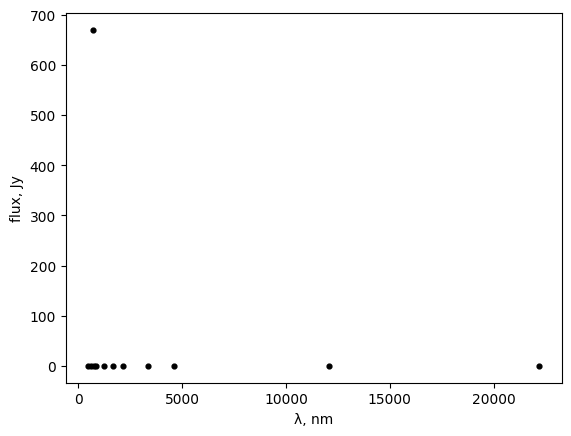

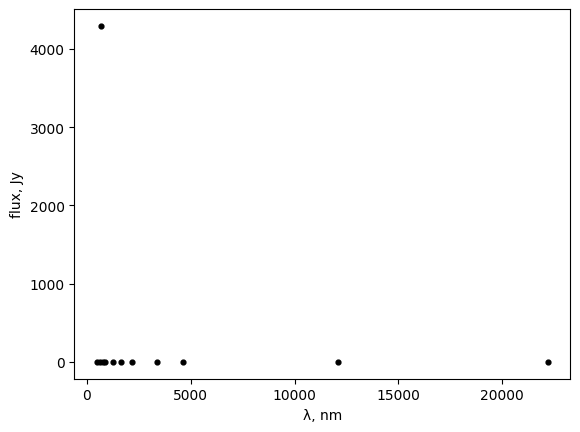

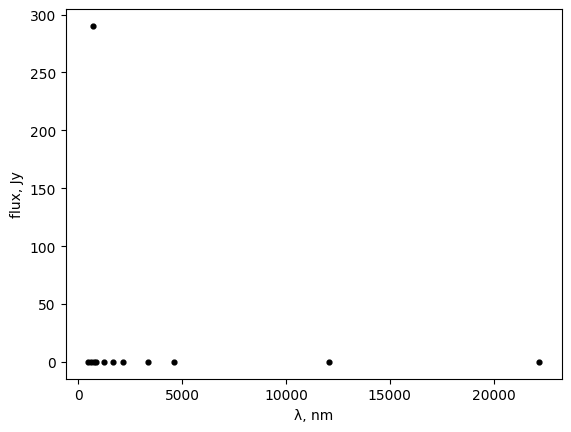

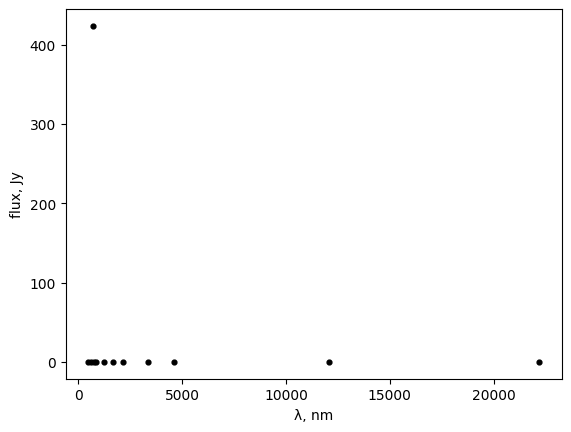

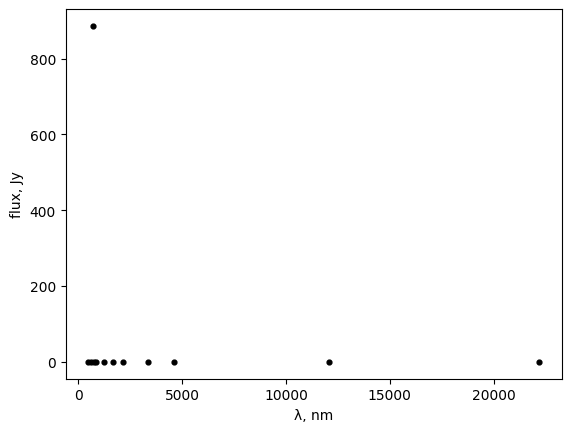

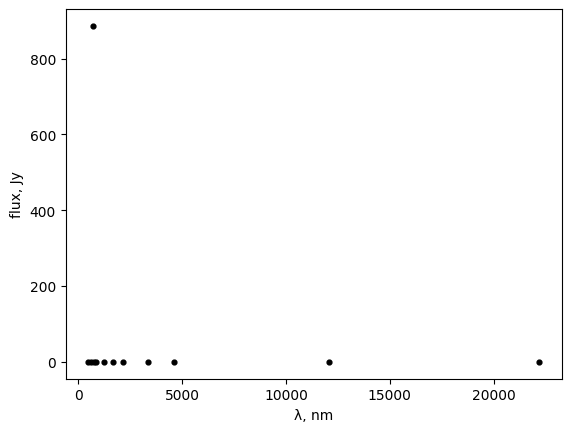

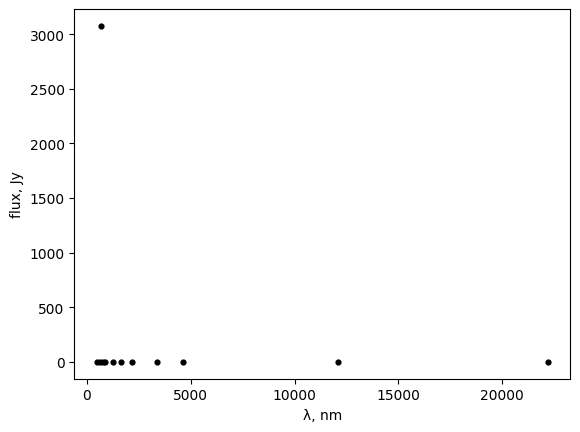

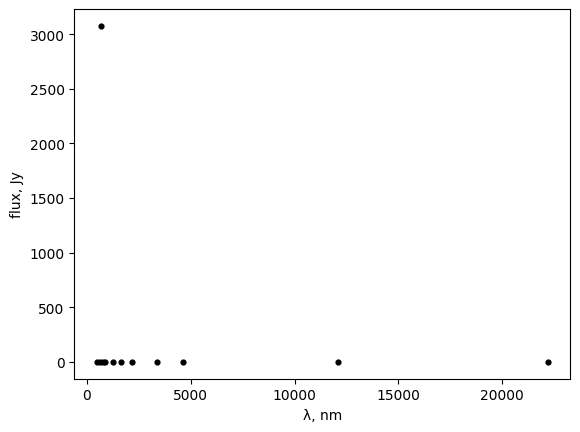

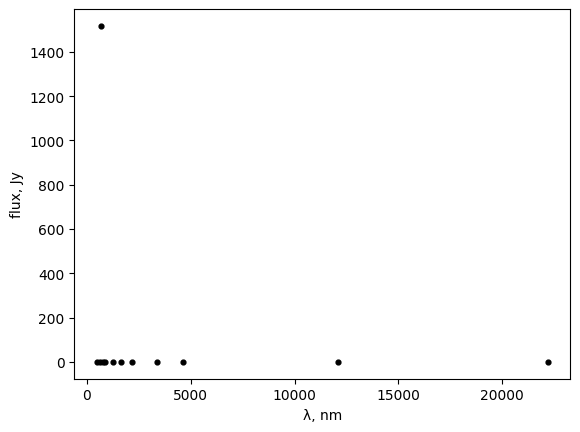

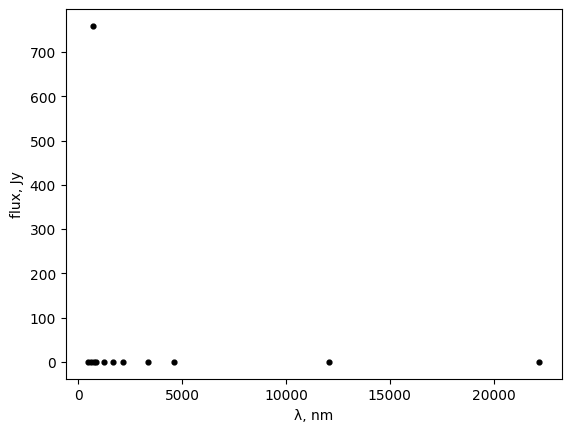

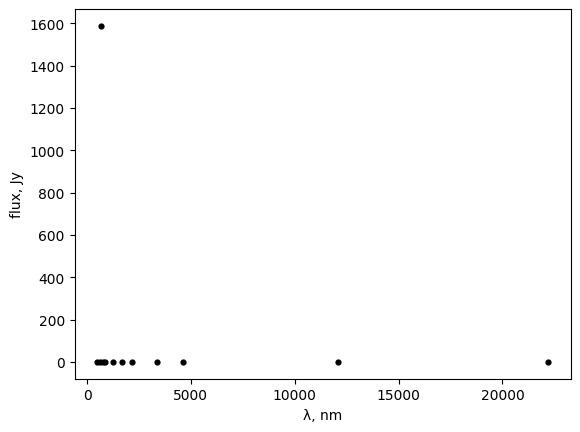

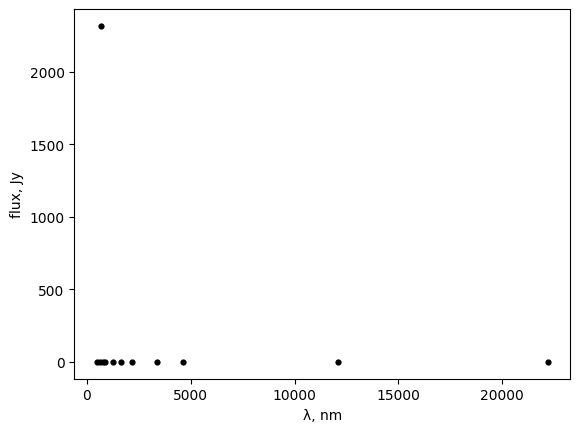

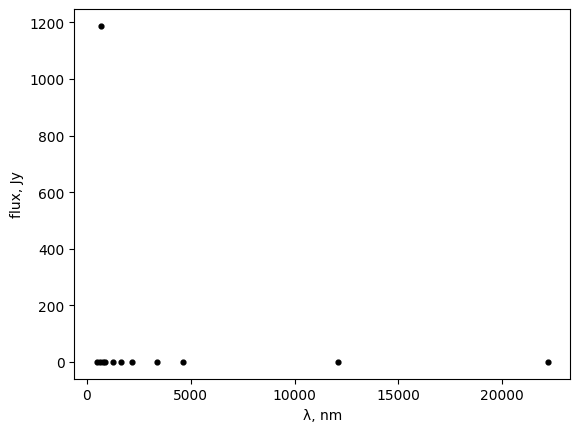

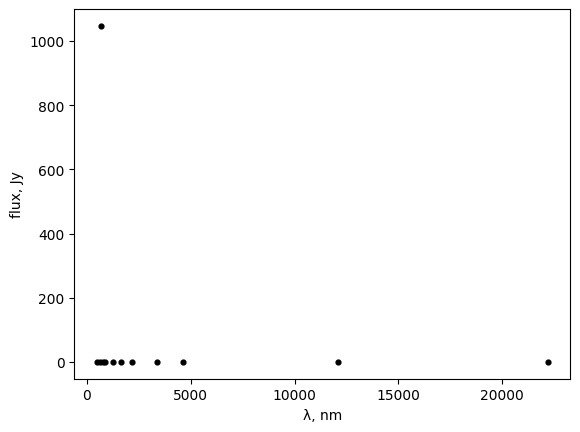

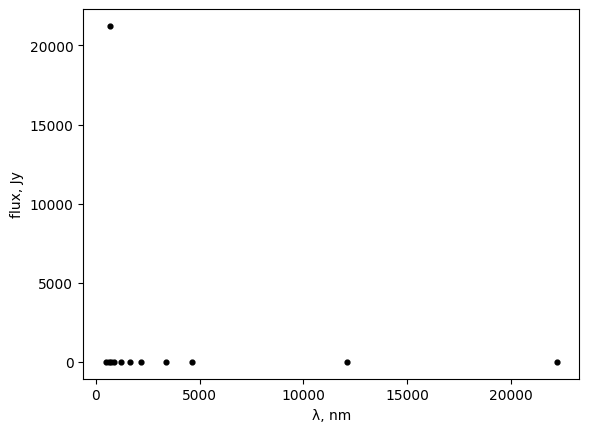

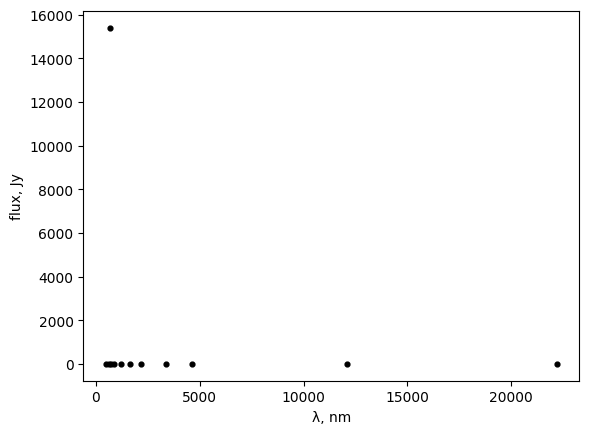

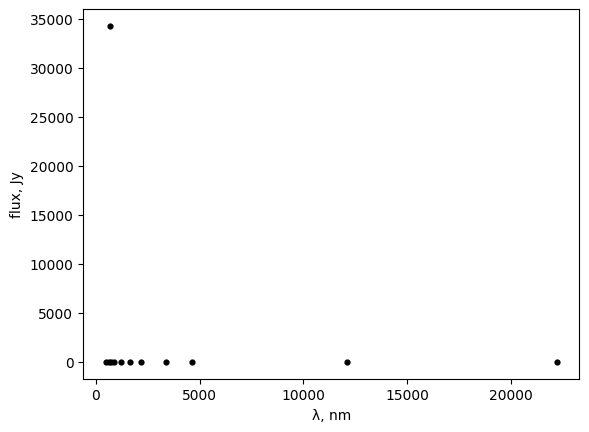

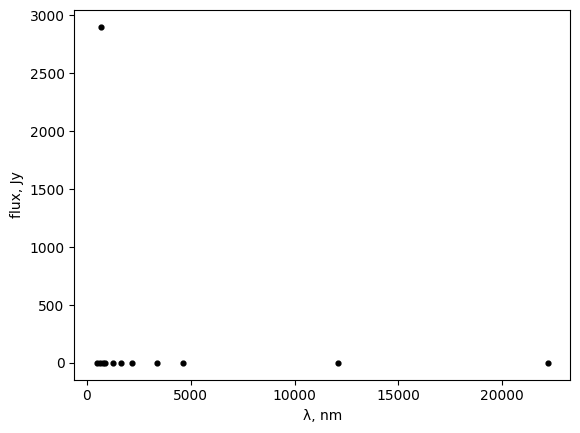

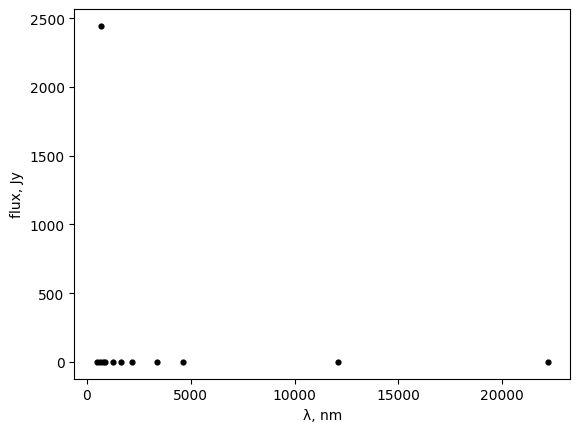

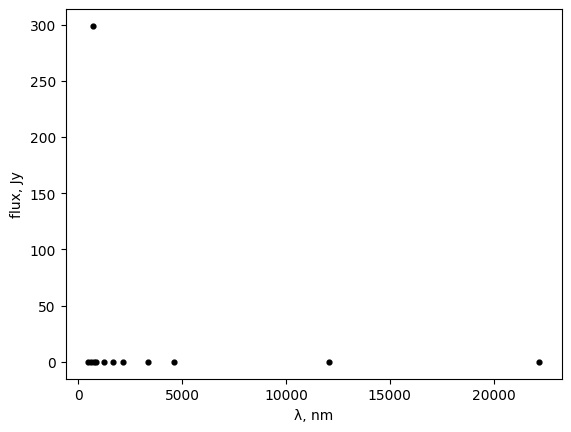

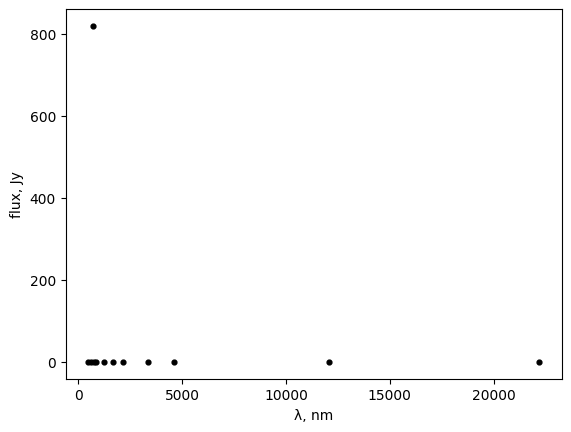

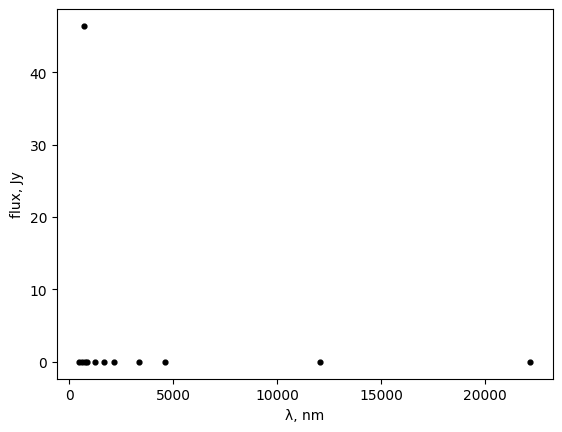

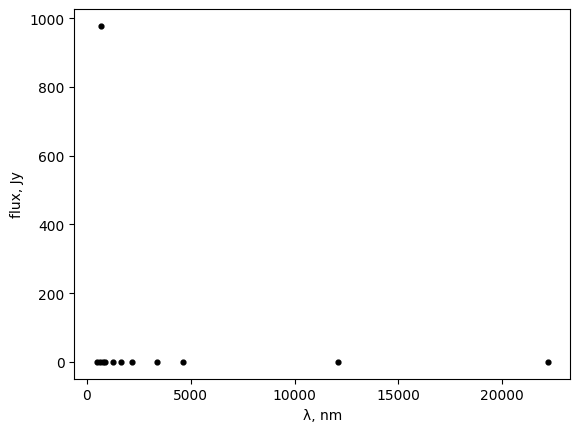

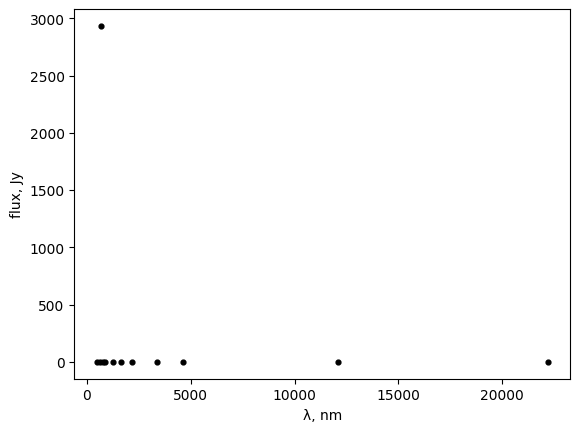

In [7]:
for i in range(len(data)):
    plt.scatter([data[i]["G_wave_length"], data[i]['J_wave_length'], data[i]['H_wave_length'], data[i]['K_wave_length'],
                 data[i]['W1_wave_length'], data[i]['W2_wave_length'], data[i]['W3_wave_length'], data[i]['W4_wave_length'],
                 data[i]['g_wave_length'], data[i]['r_wave_length'], data[i]['i_wave_length'], data[i]['z_wave_length']],
                
                [data[i]['G_flux'], data[i]['J_flux'], data[i]['H_flux'], data[i]['K_flux'],
                 data[i]['W1_flux'], data[i]['W2_flux'], data[i]['W3_flux'], data[i]['W4_flux'],
                 data[i]['g_flux'], data[i]['r_flux'], data[i]['i_flux'], data[i]['z_flux']],
                s=12, c='black')
    plt.xlabel("λ, nm")
    plt.ylabel("flux, Jy")
    plt.show()